# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.4 MB/s 
     |████████████████████████████████| 167 kB 49.9 MB/s 
     |████████████████████████████████| 6.8 MB 44.8 MB/s 
     |████████████████████████████████| 261 kB 38.6 MB/s 
     |████████████████████████████████| 1.3 MB 36.2 MB/s 
     |████████████████████████████████| 15.5 MB 35.2 MB/s 
     |████████████████████████████████| 2.0 MB 49.2 MB/s 
     |████████████████████████████████| 1.7 MB 51.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 43.8 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 102 kB 12.4 MB/s 
     |████████████████████████████████| 10.1 MB 42.9 MB/s 
     |████████████████████████████████| 3.1 MB 46.6 MB/s 
     |████████████████████████████████| 675 kB 44.1 MB/s 
     |██████████████

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [5]:
# 제출 점수(제출 날짜) : 0.681889977(2021-12-30 11:46:51)

# 설정

In [6]:
# pycaret : cat
# probability_threshold : 0.2923
# tune : ❌(자체 점수 떨어짐.)

# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [7]:
# 제거 특성(16개) : 기본5개 + 매칭 속성6개 + 5개(target별 차이 적은 특성)
# 'id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'
# 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn'
# 'person_attribute_a', 'person_attribute_a_1', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_k'

In [8]:
# 매칭 속성

In [9]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 불러오기

In [10]:
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [12]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [14]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

In [15]:
# test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
#  'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
#  'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
#  'person_prefer_e',
#  'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
#  'contents_attribute_i', 'contents_attribute_a',
#  'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
#  'contents_attribute_l', 'contents_attribute_d',
#  'contents_attribute_m', 'contents_attribute_e',
#  'contents_attribute_h',
#  'person_rn']
# target = ['target']
# train_col = test_col + target
# len(train_col), len(test_col)

In [16]:
# train = train[train_col]
# test = test[test_col]

## 훈련에 의미가 적은 열 제거

In [17]:
# 삭제할 특성
pop_col = ['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn', 
           'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn','h_m_match_yn', 
           'h_s_match_yn', 'person_attribute_a', 'person_attribute_a_1', 'contents_attribute_i',
            'contents_attribute_a', 'contents_attribute_k']
len(pop_col)

16

In [18]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   person_attribute_b      501951 non-null  int64
 1   person_prefer_c         501951 non-null  int64
 2   person_prefer_d_1       501951 non-null  int64
 3   person_prefer_d_2       501951 non-null  int64
 4   person_prefer_d_3       501951 non-null  int64
 5   person_prefer_e         501951 non-null  int64
 6   person_prefer_h_1       501951 non-null  int64
 7   person_prefer_h_2       501951 non-null  int64
 8   person_prefer_h_3       501951 non-null  int64
 9   contents_attribute_j_1  501951 non-null  int64
 10  contents_attribute_j    501951 non-null  int64
 11  contents_attribute_c    501951 non-null  int64
 12  contents_attribute_l    501951 non-null  int64
 13  contents_attribute_d    501951 non-null  int64
 14  contents_attribute_m    501951 non-null  int64
 15  

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   person_attribute_b      46404 non-null  int64
 1   person_prefer_c         46404 non-null  int64
 2   person_prefer_d_1       46404 non-null  int64
 3   person_prefer_d_2       46404 non-null  int64
 4   person_prefer_d_3       46404 non-null  int64
 5   person_prefer_e         46404 non-null  int64
 6   person_prefer_h_1       46404 non-null  int64
 7   person_prefer_h_2       46404 non-null  int64
 8   person_prefer_h_3       46404 non-null  int64
 9   contents_attribute_j_1  46404 non-null  int64
 10  contents_attribute_j    46404 non-null  int64
 11  contents_attribute_c    46404 non-null  int64
 12  contents_attribute_l    46404 non-null  int64
 13  contents_attribute_d    46404 non-null  int64
 14  contents_attribute_m    46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [21]:
# # 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
# train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
# train.head()

In [22]:
# # 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
# test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
# test.head()

# 모델 훈련/예측

In [23]:
# 순서형 특성 수치형으로 지정(2개) : ⭕
# 'person_prefer_e', 'contents_attribute_e'

In [24]:
ex = setup(train, target='target', n_jobs=-1, use_gpu=True,
           session_id=0, verbose=False, silent=True, 
           fold=5, fold_shuffle=True,
           numeric_features=['person_prefer_e', 'contents_attribute_e']
           )

## 모델 비교

In [25]:
compare_models(sort='F1')
# 60m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6067,0.6491,0.6736,0.5938,0.6312,0.2134,0.2154,6.940
catboost,CatBoost Classifier,0.6068,0.6492,0.6720,0.5942,0.6307,0.2136,0.2155,16.390
rf,Random Forest Classifier,0.6055,0.6492,0.6150,0.6032,0.6091,0.2110,0.2111,118.256
gbc,Gradient Boosting Classifier,0.5902,0.6268,0.6197,0.5848,0.6018,0.1804,0.1807,144.030
et,Extra Trees Classifier,0.5909,0.6265,0.5932,0.5902,0.5917,0.1819,0.1819,169.492
ridge,Ridge Classifier,0.5712,0.0000,0.5897,0.5683,0.5788,0.1424,0.1425,1.192
lda,Linear Discriminant Analysis,0.5712,0.6000,0.5896,0.5683,0.5788,0.1424,0.1425,14.174
ada,Ada Boost Classifier,0.5732,0.6038,0.5840,0.5713,0.5776,0.1464,0.1464,33.152
dt,Decision Tree Classifier,0.5493,0.5493,0.5517,0.5487,0.5502,0.0986,0.0986,12.400
knn,K Neighbors Classifier,0.5426,0.5561,0.5566,0.5411,0.5487,0.0851,0.0852,40.732


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
# 모델 생성
model = create_model('catboost')
# 1m 37s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6055,0.6487,0.6717,0.5929,0.6298,0.2111,0.2130
1,0.6042,0.6463,0.6696,0.5918,0.6283,0.2084,0.2102
2,0.6108,0.6531,0.6731,0.5982,0.6334,0.2216,0.2234
3,0.6074,0.6495,0.6711,0.5950,0.6308,0.2150,0.2167
4,0.6056,0.6479,0.6741,0.5926,0.6307,0.2113,0.2133
Mean,0.6067,0.6491,0.6719,0.5941,0.6306,0.2135,0.2153
SD,0.0023,0.0023,0.0016,0.0023,0.0017,0.0046,0.0045


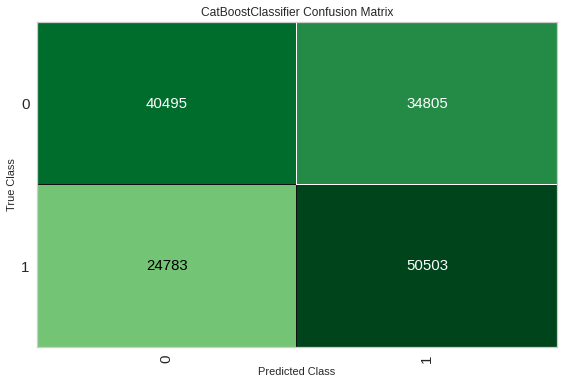

In [27]:
plot_model(model, plot='confusion_matrix')

In [28]:
# optimize threshold for trained model
optimize_threshold(model, false_negative=-1500, false_positive=-500)

0.2923

## train 예측, F1 자체평가

In [29]:
from pycaret.utils import check_metric

In [30]:
th = 0.2923
train_pred = predict_model(model, train, probability_threshold=th)
check_metric(train['target'], train_pred['Label'], metric = 'F1')
# fn, fp = -1500, -500 -> 0.2923/0.6813

0.6813

## test 예측

In [31]:
# 예측
pred = predict_model(model, test, probability_threshold=th)

In [32]:
pred.iloc[:,-2:].head(20)

,Label,Score
0,1,0.4839
1,1,0.3905
2,1,0.4435
3,1,0.5738
4,1,0.5389
5,0,0.7730
6,1,0.5093
7,0,0.7456
8,1,0.4884
9,1,0.4283


In [33]:
pred['Label']

0        1
1        1
2        1
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int64

In [34]:
pred['Label'].value_counts()

1    43221
0     3183
Name: Label, dtype: int64

# 제출파일 불러오기

In [35]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [36]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [37]:
sub['target'] = pred['Label']
sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver3.0.csv', index=False)

In [38]:
sub.head(10)

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,1


# 코드 마지막